In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 11.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.13.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
google-colab 1

In [ ]:
!pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 164 kB 39.2 MB/s 
     |████████████████████████████████| 4.3 MB 37.2 MB/s 
     |████████████████████████████████| 77 kB 5.5 MB/s 
     |████████████████████████████████| 181 kB 63.7 MB/s 
     |████████████████████████████████| 111 kB 56.2 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 131 kB 28.1 MB/s 
     |████████████████████████████████| 130 kB 58.6 MB/s 
     |████████████████████████████████| 793 kB 47.6 MB/s 
     |████████████████████████████████| 428 kB 44.9 MB/s 
     |████████████████████████████████| 381 kB 49.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1

In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Use fivethirtyeight plot style
plt.style.use('fivethirtyeight')

In [ ]:
# We will be using amazon share price dat whichcanbe downloaded from YAHOO finance website.
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("GOOG", start="2015-01-01", end="2020-12-31")
data.reset_index(inplace=True)
df=data
df.head()

df.columns


[*********************100%***********************]  1 of 1 completed


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
# add two columnsin dataframe having values as Date and Adj Close
df[['ds', 'y']] = df[['Date', 'Adj Close']]
# Subset two columns from data frame
df = df[['ds', 'y']]
 
df.head()


,ds,y
0,2015-01-02,523.373108
1,2015-01-05,512.463013
2,2015-01-06,500.585632
3,2015-01-07,499.727997
4,2015-01-08,501.303680


In [ ]:
split_date = "2019-12-31"
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

In [ ]:
df_train.tail()

,ds,y
1253,2019-12-24,1343.560059
1254,2019-12-26,1360.400024
1255,2019-12-27,1351.890015
1256,2019-12-30,1336.140015
1257,2019-12-31,1337.020020


In [ ]:
df_test.head()

,ds,y
1258,2020-01-02,1367.369995
1259,2020-01-03,1360.660034
1260,2020-01-06,1394.209961
1261,2020-01-07,1393.339966
1262,2020-01-08,1404.319946


In [ ]:
model = fbp.Prophet()
# fit the training data
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
77,2020-04-23,1388.892587,1325.006821,1438.941092,1365.381984,1414.999483,-6.331024,-6.331024,-6.331024,-5.957902,-5.957902,-5.957902,-0.373121,-0.373121,-0.373121,0.0,0.0,0.0,1382.561563
78,2020-04-24,1389.561065,1326.590700,1438.124178,1365.663758,1415.757025,-6.401269,-6.401269,-6.401269,-5.952033,-5.952033,-5.952033,-0.449236,-0.449236,-0.449236,0.0,0.0,0.0,1383.159796
79,2020-04-27,1391.566499,1325.049102,1443.394437,1366.410085,1417.734256,-8.703933,-8.703933,-8.703933,-7.481844,-7.481844,-7.481844,-1.222088,-1.222088,-1.222088,0.0,0.0,0.0,1382.862566
80,2020-04-28,1392.234977,1328.647286,1440.513951,1366.658861,1418.567282,-8.677723,-8.677723,-8.677723,-7.014606,-7.014606,-7.014606,-1.663118,-1.663118,-1.663118,0.0,0.0,0.0,1383.557253
81,2020-04-29,1392.903455,1328.181046,1440.404482,1366.907636,1419.830458,-8.544564,-8.544564,-8.544564,-6.351538,-6.351538,-6.351538,-2.193026,-2.193026,-2.193026,0.0,0.0,0.0,1384.358891


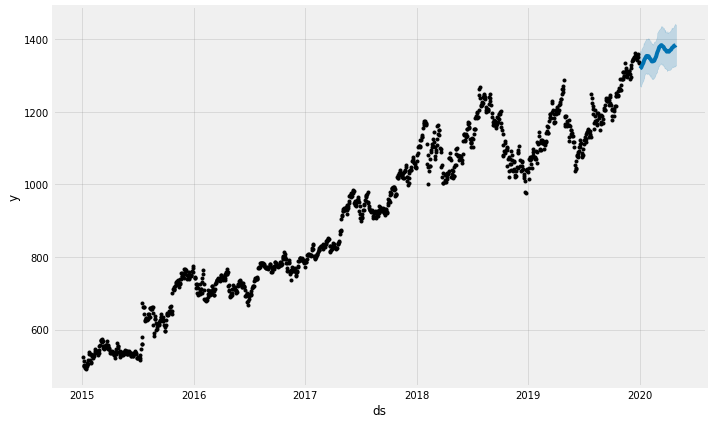

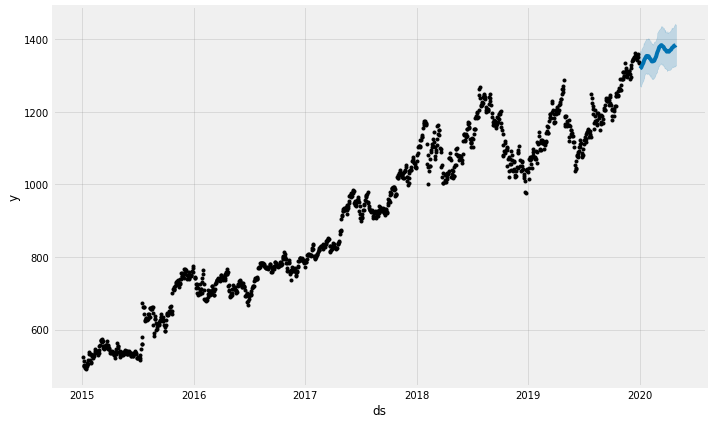

In [ ]:
model.plot(forecast)

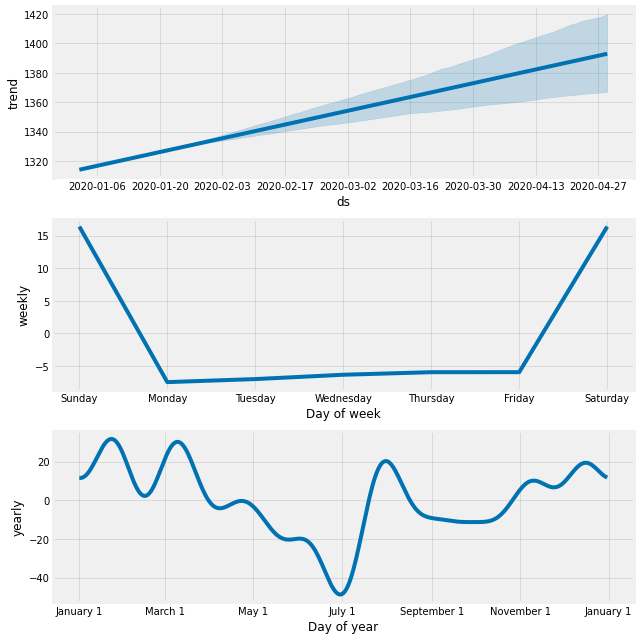

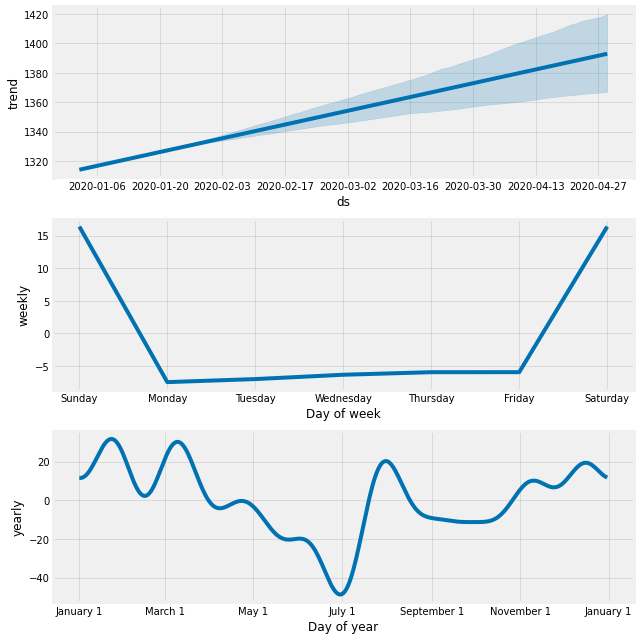

In [ ]:
model.plot_components(forecast)

In [ ]:
print("Mean Squared Error (MSE):", mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat']))

Mean Squared Error (MSE): 25162.690128024686
Mean Absolute Error (MAE): 140.38489180762448


In [ ]:
def mean_abs_perc_err(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true = np.asarray(df_test["y"]), y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  11.133769223870905
